# Machine Learning Engineer Nanodegree
## Capstone Project

## Let's Begin!

This Capstone Project aims to gain insights into [San Francisco Salary Dataset](https://www.kaggle.com/kaggle/sf-salaries) available on Kaggle.

Let's load the dataset and report its shape.

For the purpose of ease of computation, we will only be working with the data belonging to year 2014.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
try:
    data = pd.read_csv("SanFranSalary.csv", index_col='Id')
    data = data[data.Year == 2014]
    print "Salary dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Salary dataset has 38123 samples with 12 features each.


/home/mayankbad0la/UdacityNanoDegs/MachineLearning/venv/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Exploration
Upon manual inspection of the dataset, the following features can be used for statistical analysis:
* BasePay
* OvertimePay
* OtherPay
* Benefits
* TotalPay
* TotalPayBenefits

Let's find out the default datatype assigned by pandas to our dataset.

In [2]:
data.dtypes

EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

It seems our data is dirty as some numeric fields have been assigned the type 'object'.

Let's find the count of all the `NaN` records.

In [3]:
data.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay                 0
OvertimePay             0
OtherPay                0
Benefits                0
TotalPay                0
TotalPayBenefits        0
Year                    0
Notes               38123
Agency                  0
Status                  4
dtype: int64

Let's have a peak at our dataset as well.

In [4]:
data.tail()

EmployeeName                    JobTitle       BasePay   OvertimePay  \
Id                                                                              
148650  Roy I Tillery                   Custodian          0.00          0.00   
148651   Not provided                Not provided  Not Provided  Not Provided   
148652   Not provided                Not provided  Not Provided  Not Provided   
148653   Not provided                Not provided  Not Provided  Not Provided   
148654      Joe Lopez  Counselor, Log Cabin Ranch          0.00          0.00   

            OtherPay      Benefits  TotalPay  TotalPayBenefits  Year  Notes  \
Id                                                                            
148650          0.00          0.00      0.00              0.00  2014    NaN   
148651  Not Provided  Not Provided      0.00              0.00  2014    NaN   
148652  Not Provided  Not Provided      0.00              0.00  2014    NaN   
148653  Not Provided  Not Provided      0.00              0.00  2014    NaN   
148654       -618.13          0.00   -618.13           -618.13  2014    NaN   

               Agency Status  
Id                            
148650  San Francisco     PT  
148651  San Francisco    NaN  
148652  San Francisco    NaN  
148653  San Francisco    NaN  
148654  San Francisco     PT

BasePay and JobTitle are critical features as they can be considered the core functions of a salary dataset. It will be very much wiser to drop rows that don't have these, rather than extrapolating or making assumptions on the dataset.

It would be beneficial to clean up all the other dirty data by assigning an appropriate filler value.

In [5]:
data = data[data.JobTitle != 'Not Provided'] # Remove records where JobTitle is `Not Provided`

data = data[data.BasePay != 'Not Provided'] # Remove records where BasePay is `Not Provided`

data['Benefits'].fillna(0.00, inplace=True) # Fill dirty `Benefits` records with `0.00`

For the final data-cleanup, let's just keep the numeric entities in our `data`. We should although store JobTitle and Year for future reference.

In [6]:
del data['EmployeeName']

del data['Notes']

del data['Agency']

del data['Status']

data.dropna(inplace=True)

job_title = data['JobTitle']

year = data['Year']

del data['JobTitle']

del data['Year']

data['OvertimePay'].replace('Not Provided', 0.00)

data['OtherPay'].replace('Not Provided', 0.00)

data['Benefits'].replace('Not Provided', 0.00)

data = data.apply(pd.to_numeric) # Force dtype conversion

# Remove negative entries from the dataset
data = data[data.BasePay > 0]
data = data[data.OvertimePay > 0]
data = data[data.OtherPay > 0]
data = data[data.Benefits > 0]

print 'New shape of the data is ({},{})'.format(*data.shape)

print data.isnull().sum()

data.tail()

New shape of the data is (16506,6)
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
dtype: int64


BasePay  OvertimePay  OtherPay  Benefits  TotalPay  TotalPayBenefits
Id                                                                          
147468  1182.12       487.38     44.03     17.13   1713.53           1730.66
147536  1160.08       426.15     15.15     16.01   1601.38           1617.39
147659  1282.97        36.66     49.85     13.69   1369.48           1383.17
147660   426.44       273.24    431.56    248.79   1131.24           1380.03
147690   365.68       705.24     12.19    245.64   1083.11           1328.75

There seems to be some outliers in the dataset which we will resolve soon.

### Initial Statistical Analysis

In [7]:
data.describe()

BasePay    OvertimePay       OtherPay      Benefits  \
count   16506.000000   16506.000000   16506.000000  16506.000000   
mean    77579.946688   12021.026029    6149.814291  30301.109775   
std     34280.869563   15314.183137    8520.963257  10927.994011   
min       359.970000       3.570000       1.630000     13.690000   
25%     54909.877500    2106.437500    1127.452500  26491.907500   
50%     71066.000000    6311.575000    3621.600000  31754.590000   
75%    104411.020000   15942.750000    8145.482500  37313.415000   
max    318835.490000  173547.730000  152037.570000  89540.230000   

            TotalPay  TotalPayBenefits  
count   16506.000000      16506.000000  
mean    95750.787008     126051.896783  
std     46678.240152      56110.174913  
min      1083.110000       1328.750000  
25%     63074.445000      89163.007500  
50%     87414.910000     118582.845000  
75%    127963.577500     164817.370000  
max    390111.980000     479652.210000

### Visualising Feature Distribution
We'll create a scatter plot to understand our data better, so as to observe any existing correlation between features. 

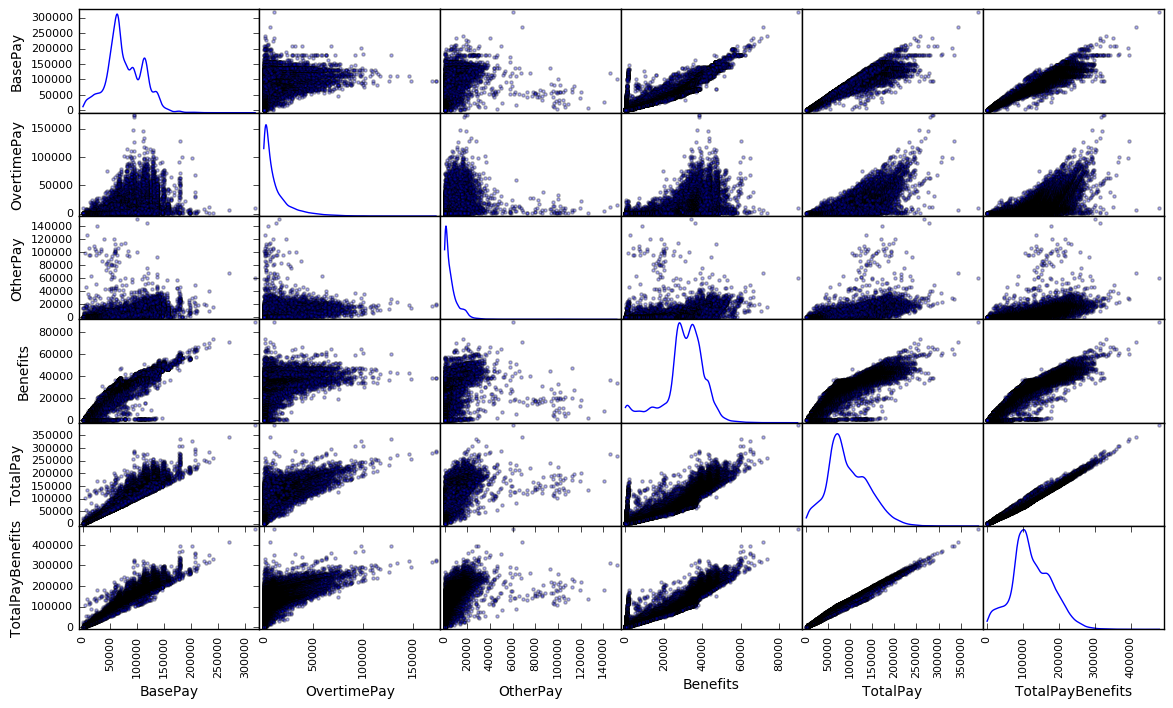

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

**Observations:**

* _BasePay_ and _TotalPayBenefits_ appear to be correlated.
* _BasePay_ and _TotalPay_ appear to be correlated.
* _TotalPay_ and _TotalPayBenefits_ appear to be correlated. 
* _BasePay_ and _Benefits_ appear to be correlated.
* The data isn't normally distributed.
* As mean and median of some features vary significantly, we should look for some feature scaling to help us make sense of the data better.

## Data Preprocessing
### Feature Scaling
Keeping things simple, let us apply a natural logarithm scale.

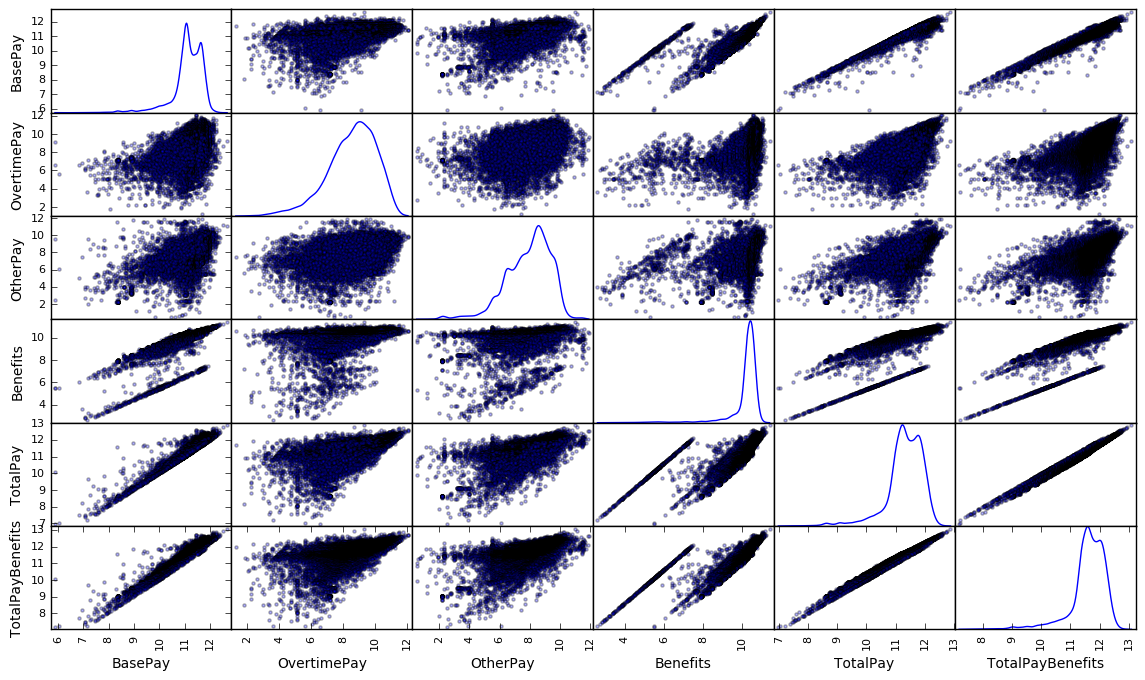

In [9]:
scaled_data = np.log(data)

pd.scatter_matrix(scaled_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Our scaled dataset gives some interesting insights:

* What appeared to be correlation between various features has been broken upon scaling.
* _TotalPay_ and _BasePay_ , _TotalPayBenefits_ and _BasePay_ are the remaining correlated features. Their correlation has substantially improved upon scaling.
* There is some discrepancy in the Benefits given to different employees.
* Many of the plots are appear to be random now.

### Outlier Detection
Interquartile range is the range of 25th percentile of the data and 75th percentile of the data. It plays an important role in identifying outliers.

From our data description, _TotalPayBenefits_ is the sum of all the different kinds of Compensation (from inspection), hence, it would be wise to remove outliers for _TotalPayBenefits_ and it would automatically take care of other feature's outliers.

In [10]:
# Q1 (25th percentile of the data) for the 'TotalPayBenefits'
Q1 = np.percentile(scaled_data['TotalPayBenefits'], 25)
    
# Q3 (75th percentile of the data) for the 'TotalPayBenefits'
Q3 = np.percentile(scaled_data['TotalPayBenefits'], 75)
    
# Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
step = 1.5*(Q3-Q1)
    
# Display the outliers
print "Data points considered outliers for the feature '{}':".format('TotalPayBenefits')
display(scaled_data[~((scaled_data['TotalPayBenefits'] >= Q1 - step) & (scaled_data['TotalPayBenefits'] <= Q3 + step))])

# Remove the outliers
scaled_and_trimmed_data = scaled_data[((scaled_data['TotalPayBenefits'] >= Q1 - step) & (scaled_data['TotalPayBenefits'] <= Q3 + step))]

print 'Final shape of the dataset is ({}, {})'.format(*scaled_and_trimmed_data.shape)

Data points considered outliers for the feature 'TotalPayBenefits':


BasePay  OvertimePay   OtherPay   Benefits   TotalPay  \
Id                                                                
110533  12.672431     9.279209  11.011448  11.402443  12.874189   
110537  12.506999     8.701050  11.126619  11.178578  12.748942   
139974   9.837211     8.916534   4.682039   9.122919  10.176550   
139975   9.984214     5.139146   6.434193   9.470098  10.020152   
139983   9.839607     8.514730   6.330113   9.310189  10.098695   
139989   9.876866     7.674232   7.167323   9.424867  10.039902   
139990   9.320450     7.534282   9.814088   8.288984  10.352163   
139991  10.082430     6.435076   7.438678   9.109443  10.175149   
139998  10.050417     7.766976   8.311381   8.634701  10.295418   
139999   9.843011     8.130933   7.181181   9.365429  10.066403   
140011  10.029129     7.120307   5.443845   9.299689  10.091861   
140013   9.911422     7.579311   5.552262   9.446763  10.015674   
140014   9.904141     8.240298   8.652924   8.614342  10.293183   
140022  10.368604     5.634325   5.298317   7.863297  10.383561   
140023   9.931270     7.384610   6.606488   9.392499  10.039517   
140025  10.328365     7.503642   6.606650   7.464063  10.408578   
140030   9.744002     8.910098   7.161544   9.117395  10.156071   
140035   9.977548     4.212720   8.244749   9.151779  10.142998   
140036   9.794119     8.705122   7.409845   9.130158  10.150891   
140040  10.217801     6.558524   7.369569   8.542680  10.298181   
140045  10.147895     7.649435   7.383480   8.618021  10.283495   
140046   9.899417     6.819252   7.589083   9.389668  10.034978   
140048  10.327305     8.133893   6.084363   5.840729  10.445888   
140050   9.937976     7.483019   5.548375   9.389538  10.031715   
140054  10.160113     7.347461   7.466468   8.603376  10.280275   
140056  10.032494     7.279864   5.448718   9.225928  10.103861   
140057  10.099905     7.184432   8.336129   8.468564  10.303315   
140058   9.880989     7.366129   6.863093   9.432814  10.003011   
140063   9.924468     3.589611   7.503499   9.410269  10.011204   
140066   9.855899     7.180009   8.288627   9.218513  10.100772   
...           ...          ...        ...        ...        ...   
146501   8.025533     5.139146   4.552191   3.504055   8.108762   
146520   7.407773     6.834862   5.110903   6.362528   7.917270   
146559   8.005467     5.119071   4.125197   3.473828   8.079110   
146567   7.601187     3.417071   5.211015   6.939903   7.702705   
146601   7.974020     5.119071   3.996915   3.442339   8.047548   
146625   7.952028     5.119071   4.099166   3.423937   8.029042   
146631   7.943641     5.114515   4.334935   3.421000   8.026281   
146639   7.946296     5.119071   3.901366   3.415100   8.020185   
146667   7.884313     5.705780   3.739573   3.400530   8.005694   
146735   7.444132     5.471430   3.812424   6.789557   7.597326   
146739   7.896850     3.808439   4.659753   3.346741   7.951380   
146942   7.193761     7.137477   1.990610   3.256557   7.861985   
146986   7.721885     5.642439   3.576271   3.248435   7.853644   
147023   7.750804     5.119071   3.418382   3.227241   7.832466   
147041   7.782961     4.066117   3.428164   3.214064   7.819443   
147050   7.574723     5.724957   5.381509   3.207208   7.812819   
147213   6.835991     6.589133   5.018868   6.056854   7.500607   
147221   7.626312     3.968403   4.602166   3.092859   7.698061   
147244   7.576307     5.119071   3.612538   3.070376   7.675848   
147272   7.298763     6.402083   2.568022   3.042139   7.647123   
147334   7.539559     3.364533   3.990464   2.977568   7.582738   
147351   7.461991     5.119071   3.613347   2.967847   7.572956   
147355   7.251324     6.186044   3.629395   2.961658   7.567128   
147384   7.464000     4.723842   3.335770   2.936513   7.541582   
147438   7.061866     6.296778   3.961575   2.869035   7.474193   
147468   7.075065     6.189044   3.784871   2.840831   7.446311   
147536   7.056244     6.054791   2.718001   2.773214   7.

Final shape of the dataset is (15575, 6)


The dataset has been considerably reduced. Let's see the scatter plot once more.

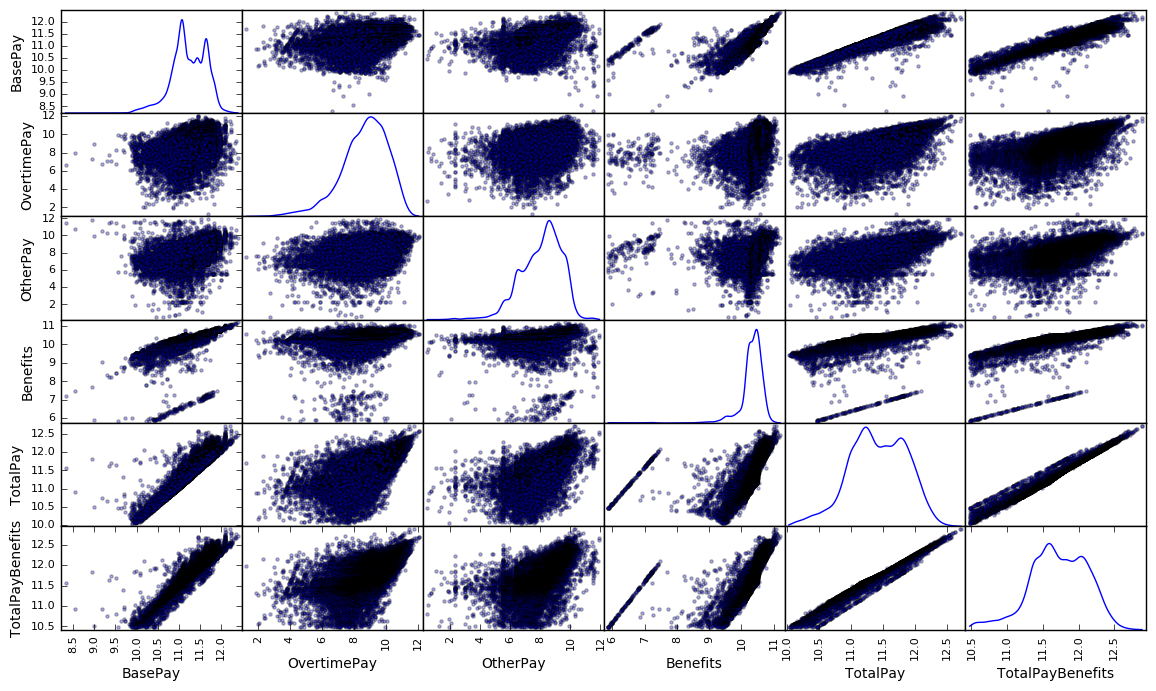

In [11]:
pd.scatter_matrix(scaled_and_trimmed_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Feature Transformation
### Principle Component Analysis

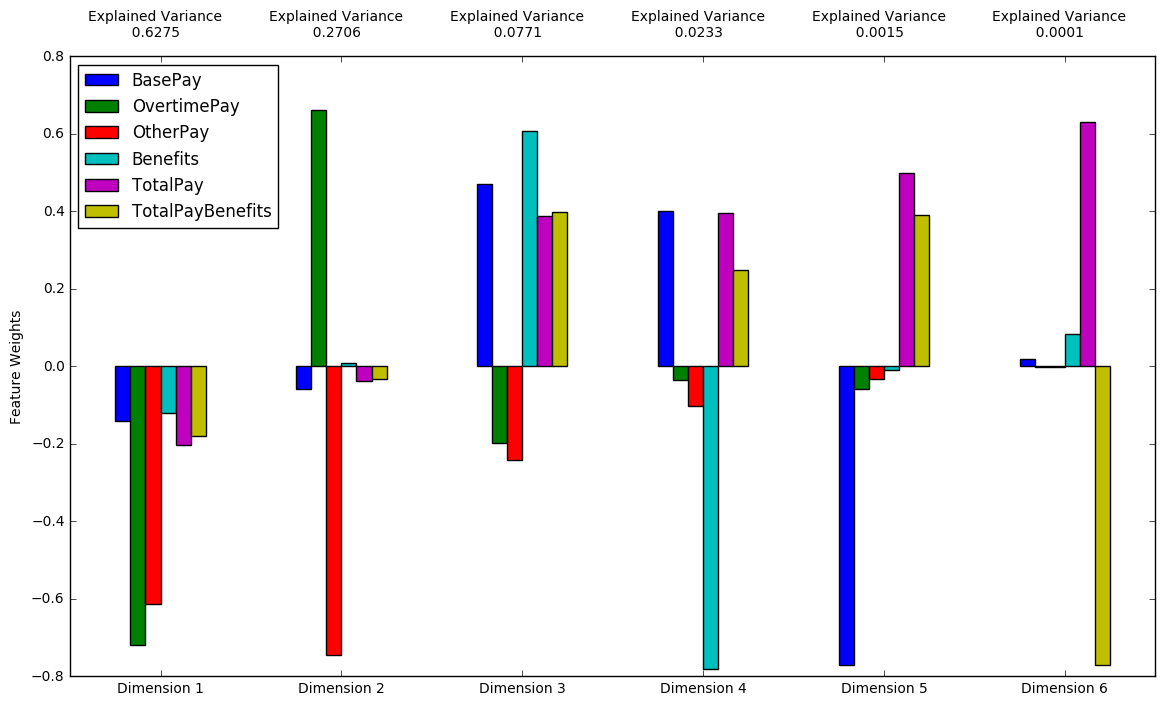

In [12]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(scaled_and_trimmed_data)

# Generate PCA results plot
pca_results = vs.pca_results(scaled_and_trimmed_data, pca)

**Observations:**

* Dimension 1 has substantial negative weight on OvertimePay and OtherPay, and minor negative weights on the remaining features.
* Dimension 2 has substantial positive weight on OvertimePay and substantial negative weight on OtherPay. Weights on other features are very insignificant.

### Dimensionality Reduction
Reducing the Dimensionality will help us get better predictions as it will help in overcoming the curse of dimensionality.
It is easier to visualise a 2-D plot, hence let us drive predictions using that.

In [13]:
pca = PCA(n_components=2)
pca.fit(scaled_and_trimmed_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(scaled_and_trimmed_data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case Dimension 1 and Dimension 2). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

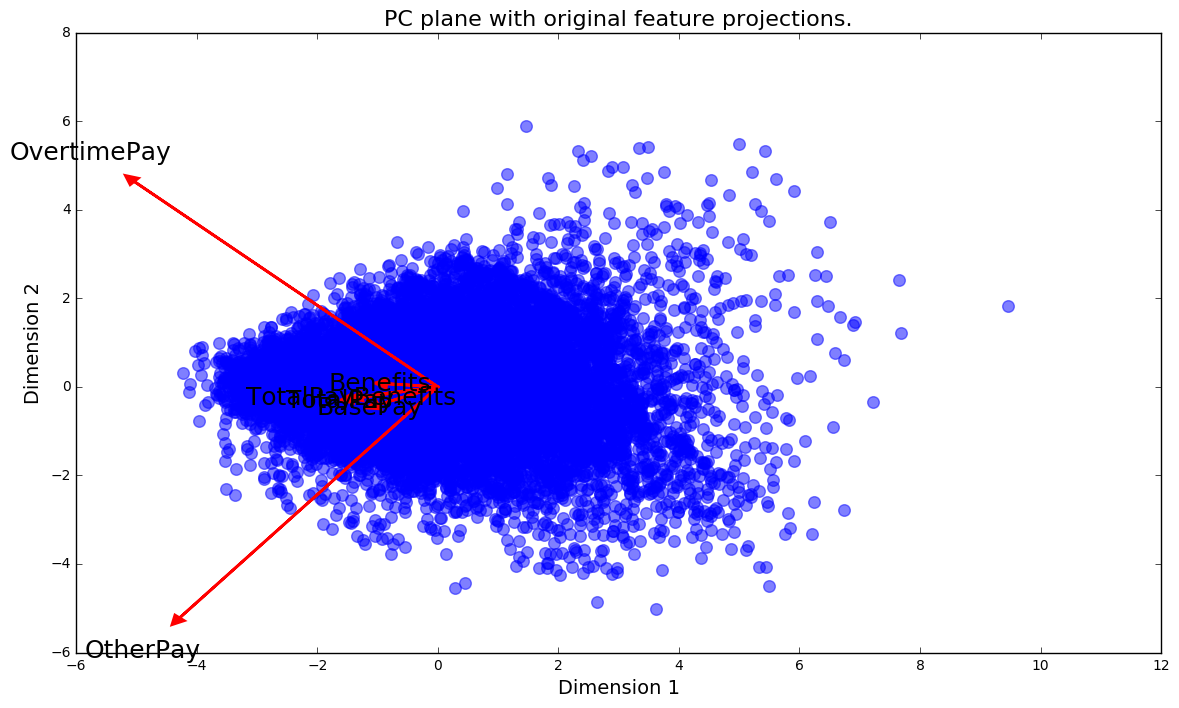

In [14]:
# Create a biplot
vs.biplot(scaled_and_trimmed_data, reduced_data, pca)

## Let's learn something!

Now that we have reduced our dataset to two features, let's try to identify clusters in the dataset.

From our analysis of the biplot, the following segments look probable:

* (High Base Pay, High Benefits, Erratic Work Hours, Miscellaneous Sources of Income/Incentives) - Executives or Positions of Responsibility.
* (Average Benefits, Long Work Hours) - Public Services Employees
* (Average Benefits, Miscellaneous Sources of Income/Incentives) - General City Employees

Silhouette Score for 3 clusters is 0.378226308274


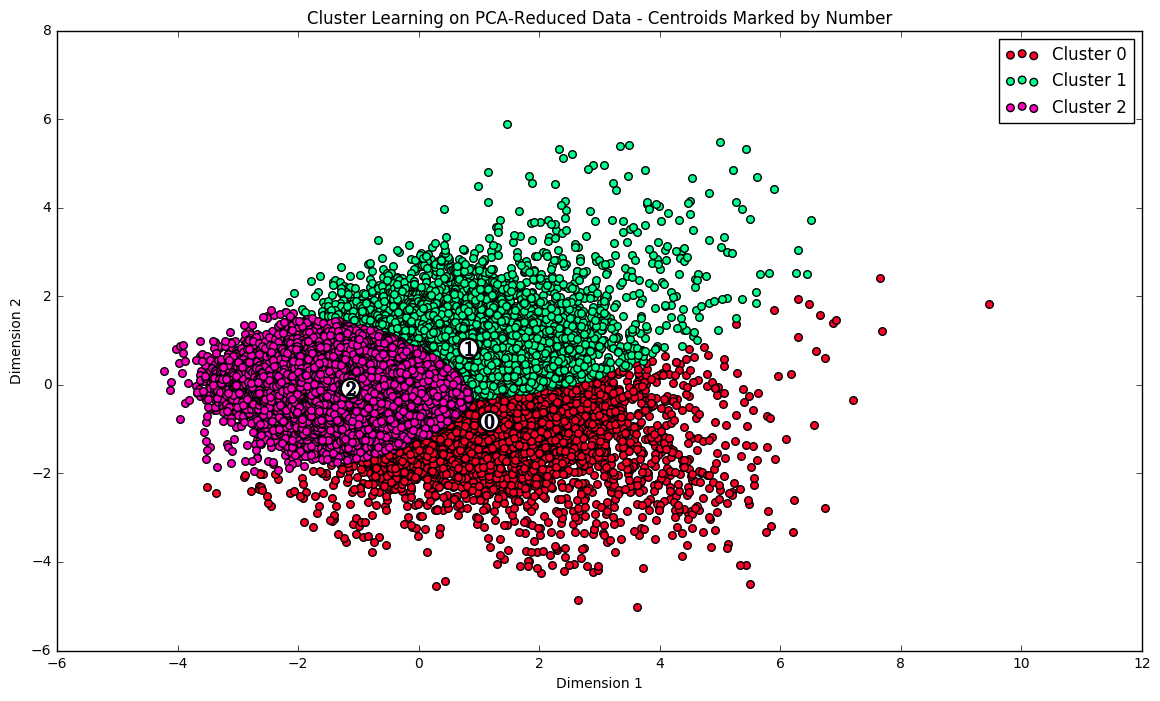

In [36]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

clusters = 3

clusterer = GMM(n_components=clusters, random_state=42)

clusterer.fit(reduced_data)

preds = clusterer.predict(reduced_data)

centers = clusterer.means_

score = silhouette_score(reduced_data, preds)

print "Silhouette Score for {} clusters is {}".format(clusters, score)
    
vs.cluster_results(reduced_data, preds, centers)

**Some of the silhouette scores were:**

* Silhouette Score for 2 clusters is 0.383381616051
* Silhouette Score for 3 clusters is 0.378226308274
* Silhouette Score for 4 clusters is 0.343257414336
* Silhouette Score for 5 clusters is 0.322824787783

**Cluster Specifications:**
* Segment 0 corresponds to General City Employees
* Segment 1 corresponds to Public Services Employees
* Segment 2 corresponds to Positions of Responsibilities (Executives)

In [37]:
log_centers = pca.inverse_transform(centers)


true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

BasePay  OvertimePay  OtherPay  Benefits  TotalPay  \
Segment 0  66916.0       1456.0    2865.0   25485.0   74298.0   
Segment 1  63888.0       5658.0    1030.0   27045.0   74930.0   
Segment 2  88878.0      12579.0    6815.0   33985.0  115589.0   

           TotalPayBenefits  
Segment 0          101772.0  
Segment 1          103002.0  
Segment 2          150815.0

To better understand the clusters, it makes sense to segregate the cluster data into different datasets.

In [39]:
cluster_0 = []
cluster_1 = []
cluster_2 = []

predictions = pd.DataFrame(preds, columns = ['Cluster'])
plot_data = pd.concat([predictions, reduced_data], axis = 1)
        
cluster_0 = plot_data[plot_data.Cluster == 0]
cluster_1 = plot_data[plot_data.Cluster == 1]
cluster_2 = plot_data[plot_data.Cluster == 2]

del cluster_0['Cluster']
del cluster_1['Cluster']
del cluster_2['Cluster']

cluster_0 = np.exp(pca.inverse_transform(cluster_0))
cluster_0 = pd.DataFrame(np.round(cluster_0), columns = scaled_and_trimmed_data.keys())
cluster_1 = np.exp(pca.inverse_transform(cluster_1))
cluster_1 = pd.DataFrame(np.round(cluster_1), columns = scaled_and_trimmed_data.keys())
cluster_2 = np.exp(pca.inverse_transform(cluster_2))
cluster_2 = pd.DataFrame(np.round(cluster_2), columns = scaled_and_trimmed_data.keys())

print 'Cluster - 0 Stats'
display(cluster_0.describe())
print 'Cluster - 1 Stats'
display(cluster_1.describe())
print 'Cluster - 2 Stats'
display(cluster_2.describe())

Cluster - 0 Stats


BasePay   OvertimePay       OtherPay      Benefits  \
count    3179.000000   3179.000000    3179.000000   3179.000000   
mean    65582.491979   1156.679144    6250.391318  24228.980497   
std     14540.952559   1050.765791   11477.263724   4158.850701   
min     17858.000000      6.000000       3.000000   9595.000000   
25%     55666.000000    417.000000    1437.500000  21433.500000   
50%     65092.000000    948.000000    2865.000000  24488.000000   
75%     72754.000000   1700.000000    6245.000000  26754.000000   
max    141279.000000  15849.000000  154918.000000  44309.000000   

            TotalPay  TotalPayBenefits  
count    3179.000000       3179.000000  
mean    71438.901227      97709.881095  
std     21754.828086      26152.536971  
min     12502.000000      21157.000000  
25%     56493.500000      79865.000000  
50%     70305.000000      96805.000000  
75%     81934.000000     110850.500000  
max    203695.000000     247565.000000

Cluster - 1 Stats


BasePay   OvertimePay     OtherPay      Benefits       TotalPay  \
count   4070.000000    4070.00000  4070.000000   4070.000000    4070.000000   
mean   60566.139066    9690.48059   851.079853  26383.074447   71102.461671   
std     9522.472632   11219.34850   526.629414   3643.313238   15804.412164   
min    24257.000000     297.00000     2.000000  13912.000000   21160.000000   
25%    55018.250000    2691.25000   427.250000  23955.000000   60930.500000   
50%    61073.000000    5333.50000   752.000000  26254.000000   70994.500000   
75%    66693.750000   12562.75000  1242.750000  28750.500000   80588.000000   
max    91405.000000  101894.00000  2961.000000  39135.000000  131507.000000   

       TotalPayBenefits  
count        4070.00000  
mean        98178.17715  
std         19432.93973  
min         33885.00000  
25%         85783.25000  
50%         98205.50000  
75%        109974.00000  
max        169968.00000

Cluster - 2 Stats


BasePay    OvertimePay      OtherPay      Benefits  \
count    8326.000000    8326.000000   8326.000000   8326.000000   
mean    90553.274562   18759.542157   9349.369205  34441.083473   
std     12854.937237   18164.310225   7502.093438   4210.786049   
min     67688.000000    2394.000000   1738.000000  26665.000000   
25%     80526.000000    6572.500000   4137.000000  31206.000000   
50%     89306.000000   12226.500000   6839.500000  34049.000000   
75%     99098.000000   24313.000000  12569.250000  37142.250000   
max    137562.000000  180187.000000  99024.000000  49540.000000   

            TotalPay  TotalPayBenefits  
count    8326.000000       8326.000000  
mean   119296.094403     154761.124309  
std     24295.285210      27835.083470  
min     77817.000000     106196.000000  
25%    100484.000000     133238.500000  
50%    116228.000000     151520.000000  
75%    134216.500000     172150.000000  
max    212701.000000     259069.000000

## Conclusion
We were able to identify three broad categories in which city employees in San Francisco could be divided.